In [1]:
# %pip install scikit-fuzzy
# %pip install networkx

In [2]:
import numpy as np
import skfuzzy as fuzz
import subprocess
import sys
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


In [3]:
#----------------------------------------
#1. Variable Declaration


temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')


#2. Define Membership Function (Triangular)


#Temperature
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 10])
temperature['warm'] = fuzz.trimf(temperature.universe, [10, 20, 30])
temperature['hot'] = fuzz.trimf(temperature.universe, [20, 40, 40])

#humitidy
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [25, 50, 75])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

#fan speed
fan_speed['slow'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['fast'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

d:\Application_Files\Anaconda\envs\foml\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


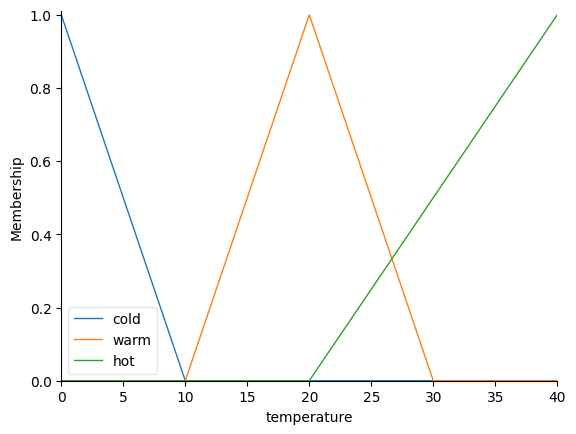

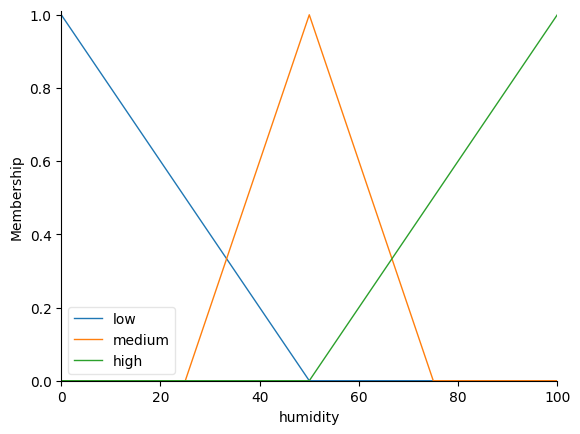

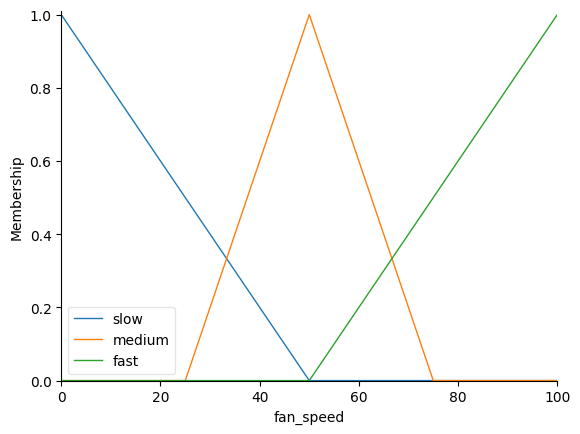

In [4]:
# Plot Membership Function

temperature.view()
humidity.view()
fan_speed.view()

In [5]:
# 4. Define Fuzzy Rule

rule1 = ctrl.Rule(temperature['cold'] & humidity['low'], fan_speed['slow'])
rule2 = ctrl.Rule(temperature['cold'] & humidity['medium'], fan_speed['slow'])
rule3 = ctrl.Rule(temperature['cold'] & humidity['high'], fan_speed['medium'])

rule4 = ctrl.Rule(temperature['warm'] & humidity['low'], fan_speed['slow'])
rule5 = ctrl.Rule(temperature['warm'] & humidity['medium'], fan_speed['medium'])
rule6 = ctrl.Rule(temperature['warm'] & humidity['high'], fan_speed['fast'])

rule7 = ctrl.Rule(temperature['hot'] & humidity['low'], fan_speed['medium'])
rule8 = ctrl.Rule(temperature['hot'] & humidity['medium'], fan_speed['fast'])
rule9 = ctrl.Rule(temperature['hot'] & humidity['high'], fan_speed['fast'])

Defuzzified Fan Speed Output:74.76


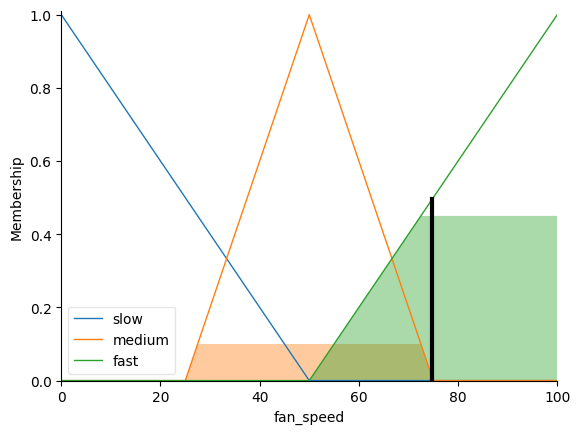

In [6]:
# 5. Build the control System

fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
fan_sim = ctrl.ControlSystemSimulation(fan_ctrl)

# 6. Fuzzification and Evaluation

# Example Inputs
fan_sim.input['temperature'] = 29  # degrees Celsius
fan_sim.input['humidity'] = 50    # percentage

fan_sim.compute()

# 7. Display and Defuzzification Output
print(f"Defuzzified Fan Speed Output:{fan_sim.output['fan_speed']:.2f}")

fan_speed.view(sim=fan_sim)

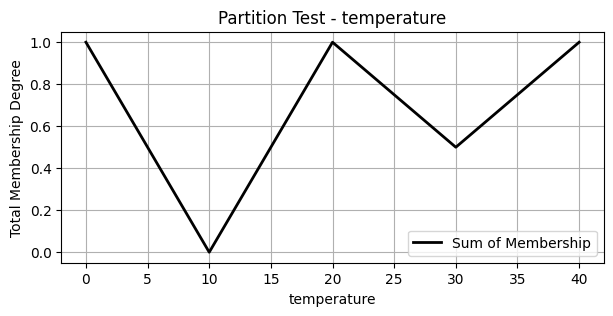

fail temperature partition Test fail: 1 points not covered by any fuzzy set.


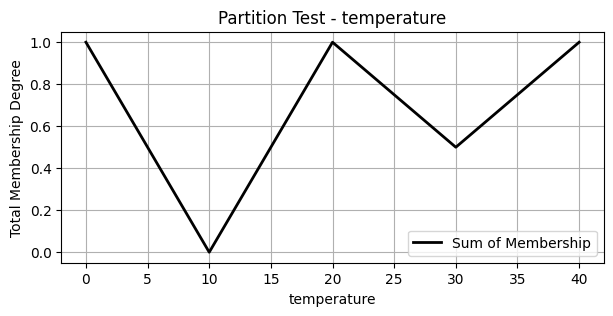

fail temperature partition Test fail: 1 points not covered by any fuzzy set.


In [7]:
def check_partition(Variable, labels, universe):
  total_membership = np.zeros_like(universe, dtype=float)

  for label in labels:
    mf = Variable[label]
    total_membership += fuzz.interp_membership(Variable.universe, mf.mf, universe)

  plt.figure(figsize=(7, 3))
  plt.plot(universe, total_membership, 'k', linewidth=2, label='Sum of Membership')
  plt.title(f"Partition Test - {Variable.label}")
  plt.xlabel(Variable.label)
  plt.ylabel("Total Membership Degree")
  plt.grid(True)
  plt.legend()
  plt.show()

  uncovered = np.sum(total_membership == 0)
  if uncovered == 0:
    print(f"Pass {Variable.label} partition Test pass.")
  else:
    print(f"fail {Variable.label} partition Test fail: {uncovered} points not covered by any fuzzy set.")


temp_universe = np.arange(0, 41, 1)
check_partition(temperature, ['cold', 'warm', 'hot'], temp_universe)


temp_universe = np.arange(0, 41, 1)
check_partition(temperature, ['cold', 'warm', 'hot'], temp_universe)

In [8]:
def check_rule_conflicts(rules):
  antecedent_text = []
  for rule in rules:
    antecedent_text.append(str(rule.antecedent)) # Access the antecedent attribute

  conflicts = {} # Use a dictionary to store conflicts
  for i, ant1 in enumerate(antecedent_text):
    for j, ant2 in enumerate(antecedent_text):
      if i < j and ant1 == ant2:
        conflicts.setdefault(ant1, []).append((i+1, j+1)) # Use setdefault to add conflicts

  if conflicts:
    print("Rule Conflict Detected:")
    for ant, pairs in conflicts.items():
      print(f" -> Conflicting antecedent: {ant}")

      for (r1, r2) in pairs:
        print(f" Rules #{r1} and #{r2}")

  else:
    print("No rule conflict detected.")

rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9]
check_rule_conflicts(rules)

No rule conflict detected.


Soil Moisture - (0-100%)
Temperature - (0- 40)
Watering duration - (0 - 30 min)